In [1]:
import pandas as pd

#Read our input csv files
path = "/Users/mostaphaatta/Desktop/Smoker_Predictor/CSV"

demographic = pd.read_csv(path+"/demographic.csv")
labs = pd.read_csv(path+"/labs.csv")
diet = pd.read_csv(path+"/diet.csv")
examination = pd.read_csv(path+"/examination.csv")
questionnaire = pd.read_csv(path+"/questionnaire.csv")

In [2]:
examination.drop(['SEQN'], axis = 1, inplace=True)
demographic.drop(['SEQN'], axis = 1, inplace=True)
diet.drop(['SEQN'], axis = 1, inplace=True)
questionnaire.drop(['SEQN'], axis = 1, inplace=True)

In [3]:
smokers_nonsmokers = pd.concat([labs, examination, demographic, diet, questionnaire], axis = 1, join = 'inner')

#dropping rows or columns where all values are NA
smokers_nonsmokers.dropna(axis=1, how='all', inplace = True)
smokers_nonsmokers.dropna(axis=0, how='all', inplace = True)

In [4]:
print(smokers_nonsmokers.groupby('SMQ040').size())

SMQ040
1.0     953
2.0     233
3.0    1298
dtype: int64


/Users/mostaphaatta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


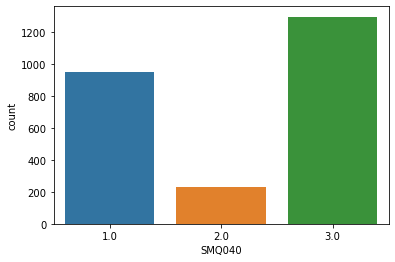

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(smokers_nonsmokers['SMQ040'])
plt.show()

In [6]:
smokers_nonsmokers = smokers_nonsmokers.loc[smokers_nonsmokers['SMQ040']>0]

In [7]:
regular_irregular_smokers = smokers_nonsmokers.loc[smokers_nonsmokers['SMQ040']!=3]

In [8]:
# group all daily smokers and irregular smokers into one category
mask = smokers_nonsmokers.SMQ040 == 2
column_name = 'SMQ040'
smokers_nonsmokers.loc[mask, column_name] = 1
mask = smokers_nonsmokers.SMQ040 == 3
column_name = 'SMQ040'
smokers_nonsmokers.loc[mask, column_name] = 0

In [9]:
print(smokers_nonsmokers.groupby('SMQ040').size())

SMQ040
0.0    1298
1.0    1186
dtype: int64


/Users/mostaphaatta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


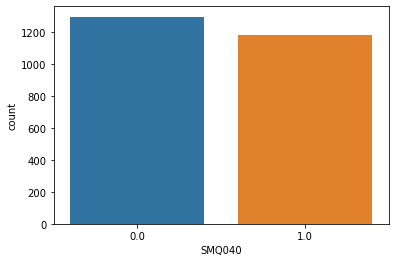

In [10]:
sns.countplot(smokers_nonsmokers['SMQ040'],label="Count")
plt.show()

In [11]:
X1 = smokers_nonsmokers.drop(['SMQ040','SEQN'] , axis = 1)

#dropping rows or columns where all values are NA
X1 = X1.dropna(axis=1, how='any')
X1 = X1.dropna(axis=0, how='any')
X1 = X1.select_dtypes(exclude='object')

Y1 = smokers_nonsmokers['SMQ040']

X1.head()

,PEASCST1,BMDSTATS,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,DMQMILIZ,DMDBORN4,...,SMAQUEX2,SMQ856,SMQ860,SMQ866,SMQ870,SMQ874,SMQ878,SMAQUEX.x,WHQ030,WHQ040
0,1,1,8,2,1,69,4,4,1.0,1,...,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0
1,1,1,8,2,1,54,3,3,2.0,1,...,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0
2,1,1,8,2,1,72,3,3,1.0,1,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,3.0,2.0
5,1,1,8,2,1,56,1,1,1.0,1,...,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0
8,1,1,8,1,1,42,2,2,2.0,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0


In [12]:
X2 = regular_irregular_smokers.drop(['SMQ040','SEQN'] , axis = 1)

#dropping rows or columns where all values are NA
X2 = X2.dropna(axis=1, how='any')
X2 = X2.dropna(axis=0, how='any')
X2 = X2.select_dtypes(exclude='object')

Y2 = regular_irregular_smokers['SMQ040']

X2.head()

,PEASCST1,BMDSTATS,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,DMQMILIZ,DMDBORN4,...,SMAQUEX2,SMQ856,SMQ860,SMQ866,SMQ870,SMQ874,SMQ878,SMAQUEX.x,WHQ030,WHQ040
1,1,1,8,2,1,54,3,3,2.0,1,...,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0
9,1,1,8,2,2,56,3,3,2.0,1,...,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0
10,1,1,8,2,1,65,3,3,2.0,1,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0
41,1,1,8,2,1,20,1,1,2.0,1,...,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,2.0
43,1,1,8,2,1,37,4,4,2.0,1,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0


In [13]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, random_state=0)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [14]:
from sklearn.linear_model import LogisticRegression

logreg1 = LogisticRegression()
logreg1.fit(X1_train, y1_train)
logreg2 = LogisticRegression()
logreg2.fit(X2_train, y2_train)

train = 'Accuracy of Logistic regression classifier on training set '
test = 'Accuracy of Logistic regression classifier on test set '

print('\nSmoker to non-smoker')
print(train+ ': {:.2f}'
     .format(logreg1.score(X1_train, y1_train)))
print(test+ ': {:.2f}'
     .format(logreg1.score(X1_test, y1_test)))

print('\nRegular to irregular smoker')
print(train+ ': {:.2f}'
     .format(logreg2.score(X2_train, y2_train)))
print(test+ ': {:.2f}'
     .format(logreg2.score(X2_test, y2_test)))


Smoker to non-smoker
Accuracy of Logistic regression classifier on training set : 0.72
Accuracy of Logistic regression classifier on test set : 0.72

Regular to irregular smoker
Accuracy of Logistic regression classifier on training set : 0.98
Accuracy of Logistic regression classifier on test set : 0.95


/Users/mostaphaatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
logreg1 = LogisticRegression()
l1 = logreg1.fit(X1_train, y1_train)
l1

print("Training set score: {:.3f}".format(l1.score(X1_train,y1_train)))
print("Test set score: {:.3f}".format(l1.score(X1_test,y1_test)))

import statsmodels.api as sm
logit_model=sm.Logit(Y1,X1)
result=logit_model.fit()
print(result.summary())

/Users/mostaphaatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set score: 0.722
Test set score: 0.720
Optimization terminated successfully.
         Current function value: 0.534701
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 SMQ040   No. Observations:                 2484
Model:                          Logit   Df Residuals:                     2394
Method:                           MLE   Df Model:                           89
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                  0.2275
Time:                        09:55:47   Log-Likelihood:                -1328.2
converged:                       True   LL-Null:                       -1719.3
Covariance Type:            nonrobust   LLR p-value:                2.393e-111
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PEASCST1      -0.0736        nan        nan        nan      

In [16]:
X1 = X1.loc[:, X2.columns.intersection(['RIDAGEYR','DMDBORN4','HUQ010','OHQ030','RIDRETH1','DMDHHSZA','RIAGENDR',
'SMQ878','SDMVSTRA','SMQ870','SMQ860','PAQ650','IMQ020','MCQ080','HUQ020','OHQ845','MCQ365B','CBQ550'])]

# Basic Data Cleaning

In [44]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2484 entries, 0 to 9812
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  2484 non-null   int64  
 1   RIDAGEYR  2484 non-null   int64  
 2   RIDRETH1  2484 non-null   int64  
 3   DMDBORN4  2484 non-null   int64  
 4   DMDHHSZA  2484 non-null   int64  
 5   SDMVSTRA  2484 non-null   int64  
 6   CBQ550    2484 non-null   float64
 7   HUQ010    2484 non-null   int64  
 8   HUQ020    2484 non-null   float64
 9   IMQ020    2484 non-null   int64  
 10  MCQ080    2484 non-null   float64
 11  MCQ365B   2484 non-null   float64
 12  OHQ030    2484 non-null   float64
 13  OHQ845    2484 non-null   float64
 14  PAQ650    2484 non-null   float64
 15  SMQ860    2484 non-null   float64
 16  SMQ870    2484 non-null   float64
 17  SMQ878    2484 non-null   float64
dtypes: float64(10), int64(8)
memory usage: 368.7 KB


In [43]:
print(X1["RIAGENDR"].unique())

[0 1]


According to documentation, '1' is Male and '2' is Female

We will change it to '0' and '1'

In [42]:
X1.loc[ X1.RIAGENDR == 1, 'RIAGENDR'] = 0
X1.loc[ X1.RIAGENDR == 2, 'RIAGENDR'] = 1

In [47]:
X1['RIDRETH1'].unique()

array([4, 3, 1, 2, 5])

### This attribute is concerned with ethnicity is infact categorical data

We will create dummies for the categories

In [49]:
print(pd.get_dummies(X1['RIDRETH1']).head(5))

   1  2  3  4  5
0  0  0  0  1  0
1  0  0  1  0  0
2  0  0  1  0  0
5  1  0  0  0  0
8  0  1  0  0  0


Let's find all features with unique categories

In [64]:
for col_name in X1.columns:
    unique_cat = len(X1[col_name].unique())
    print("Feature '{cn}' has {uc} unique categories".format(
        cn=col_name, uc=unique_cat) )

Feature 'RIAGENDR' has 2 unique categories
Feature 'RIDAGEYR' has 63 unique categories
Feature 'RIDRETH1' has 5 unique categories
Feature 'DMDBORN4' has 3 unique categories
Feature 'DMDHHSZA' has 4 unique categories
Feature 'SDMVSTRA' has 15 unique categories
Feature 'CBQ550' has 2 unique categories
Feature 'HUQ010' has 7 unique categories
Feature 'HUQ020' has 3 unique categories
Feature 'IMQ020' has 5 unique categories
Feature 'MCQ080' has 3 unique categories
Feature 'MCQ365B' has 2 unique categories
Feature 'OHQ030' has 8 unique categories
Feature 'OHQ845' has 6 unique categories
Feature 'PAQ650' has 2 unique categories
Feature 'SMQ860' has 2 unique categories
Feature 'SMQ870' has 2 unique categories
Feature 'SMQ878' has 2 unique categories


Now we will investigate the features with more than two categories

In [68]:
for col_name in X1.columns:
    unique_cat = len(X1[col_name].unique())
    if unique_cat > 2:
        print("Feature " + col_name + "\n" , X1[col_name].unique())

Feature RIDAGEYR
 [69 54 72 56 42 65 32 58 57 20 37 75 55 62 36 80 63 71 64 61 59 39 70 24
 73 44 51 78 79 23 47 48 53 46 31 68 26 30 52 77 34 38 43 50 66 67 27 60
 45 49 22 41 40 19 21 33 29 25 74 18 28 76 35]
Feature RIDRETH1
 [4 3 1 2 5]
Feature DMDBORN4
 [ 1  2 77]
Feature DMDHHSZA
 [0 1 3 2]
Feature SDMVSTRA
 [112 108 109 111 106 118 114 117 116 104 110 113 115 107 105]
Feature HUQ010
 [2 4 3 5 1 9 7]
Feature HUQ020
 [1. 2. 3.]
Feature IMQ020
 [3 9 1 2 7]
Feature MCQ080
 [1. 2. 9.]
Feature OHQ030
 [ 6.  1.  5.  3.  4.  2.  7. 99.]
Feature OHQ845
 [1. 4. 3. 2. 5. 9.]


In [75]:
print(X1.groupby('DMDBORN4').size())

DMDBORN4
1     1989
2      493
77       1
dtype: int64


In [82]:
print(X1['DMDBORN4']==77)

0       False
1       False
2       False
5       False
8       False
        ...  
9803    False
9806    False
9807    False
9810    False
9812    False
Name: DMDBORN4, Length: 2483, dtype: bool


In [17]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, random_state=0)

X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [19]:
l1 = logreg1.fit(X1_train, y1_train)

print("Training set score: {:.3f}".format(l1.score(X1_train,y1_train)))
print("Test set score: {:.3f}".format(l1.score(X1_test,y1_test)))

logit_model=sm.Logit(Y1,X1)
result=logit_model.fit()
print(result.summary())

Training set score: 0.701
Test set score: 0.709
Optimization terminated successfully.
         Current function value: 0.559168
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 SMQ040   No. Observations:                 2484
Model:                          Logit   Df Residuals:                     2466
Method:                           MLE   Df Model:                           17
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                  0.1921
Time:                        09:57:03   Log-Likelihood:                -1389.0
converged:                       True   LL-Null:                       -1719.3
Covariance Type:            nonrobust   LLR p-value:                2.071e-129
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RIAGENDR       0.2326      0.095      2.438      0.015      

In [20]:
X1.corr()

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDBORN4,DMDHHSZA,SDMVSTRA,CBQ550,HUQ010,HUQ020,IMQ020,MCQ080,MCQ365B,OHQ030,OHQ845,PAQ650,SMQ860,SMQ870,SMQ878
RIAGENDR,1.000000,-0.007993,0.008220,-0.054017,0.024421,-0.030974,-0.045190,0.026689,-0.038691,-0.025340,-0.154647,-0.116279,-0.065131,-0.033113,0.091698,0.047296,-0.009227,0.013900
RIDAGEYR,-0.007993,1.000000,-0.031128,-0.000304,-0.321962,-0.013509,0.064985,0.128082,0.066388,0.066039,-0.055576,-0.138057,-0.005498,-0.074597,0.257336,0.050982,0.111084,0.037679
RIDRETH1,0.008220,-0.031128,1.000000,-0.050888,-0.019658,0.048904,0.002396,-0.103235,0.007938,-0.110593,0.084964,0.049884,-0.044197,-0.078998,-0.021713,0.020645,-0.039540,-0.044550
DMDBORN4,-0.054017,-0.000304,-0.050888,1.000000,0.006130,-0.006683,-0.008041,0.012756,0.000245,0.079711,-0.006375,0.011507,0.003449,0.040646,-0.055491,-0.014405,0.007134,-0.003525
DMDHHSZA,0.024421,-0.321962,-0.019658,0.006130,1.000000,-0.010815,0.021056,-0.061879,0.007238,0.009184,0.083900,0.103442,0.014199,0.038581,-0.046557,0.018221,-0.016025,-0.036462
SDMVSTRA,-0.030974,-0.013509,0.048904,-0.006683,-0.010815,1.000000,-0.003134,0.052118,-0.011273,0.022985,0.027165,0.026995,0.059525,0.032216,0.062183,-0.021396,-0.027898,0.045487
CBQ550,-0.045190,0.064985,0.002396,-0.008041,0.021056,-0.003134,1.000000,0.164210,0.040112,0.030011,0.072327,0.051254,0.159054,0.120933,0.095058,0.396488,0.160014,0.146902
HUQ010,0.026689,0.128082,-0.103235,0.012756,-0.061879,0.052118,0.164210,1.000000,-0.073332,0.041583,-0.146477,-0.199550,0.099607,0.312427,0.202994,0.143371,0.026073,0.084811
HUQ020,-0.038691,0.066388,0.007938,0.000245,0.007238,-0.011273,0.040112,-0.073332,1.000000,0.015091,0.069963,0.088459,-0.006332,0.000506,0.078323,0.014443,0.011019,0.017447
IMQ020,-0.025340,0.066039,-0.110593,0.079711,0.009184,0.022985,0.030011,0.041583,0.015091,1.000000,0.034889,-0.007620,-0.009453,0.027310,0.041862,0.012650,0.018090,-0.019746


In [21]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier().fit(X1_train, y1_train)
clf2 = DecisionTreeClassifier().fit(X2_train, y2_train)

train = 'Accuracy of Decision Tree classifier on training set '
test = 'Accuracy of Decision Tree classifier on test set '

print('\nSmoker to non-smoker')
print(train+ ': {:.2f}'
     .format(clf1.score(X1_train, y1_train)))
print(test+ ': {:.2f}'
     .format(clf1.score(X1_test, y1_test)))

print('\nRegular to irregular smoker')
print(train+ ': {:.2f}'
     .format(clf2.score(X2_train, y2_train)))
print(test+ ': {:.2f}'
     .format(clf2.score(X2_test, y2_test)))


Smoker to non-smoker
Accuracy of Decision Tree classifier on training set : 1.00
Accuracy of Decision Tree classifier on test set : 0.61

Regular to irregular smoker
Accuracy of Decision Tree classifier on training set : 1.00
Accuracy of Decision Tree classifier on test set : 0.94


In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier()
knn1.fit(X1_train, y1_train)
knn2 = KNeighborsClassifier()
knn2.fit(X2_train, y2_train)


train = 'Accuracy of KNN classifier on training set '
test = 'Accuracy of KNN classifier on test set '

print('\nSmoker to non-smoker')
print(train+ ': {:.2f}'
     .format(knn1.score(X1_train, y1_train)))
print(test+ ': {:.2f}'
     .format(knn1.score(X1_test, y1_test)))

print('\nRegular to irregular smoker')
print(train+ ': {:.2f}'
     .format(knn2.score(X2_train, y2_train)))
print(test+ ': {:.2f}'
     .format(knn2.score(X2_test, y2_test)))


Smoker to non-smoker
Accuracy of KNN classifier on training set : 0.74
Accuracy of KNN classifier on test set : 0.60

Regular to irregular smoker
Accuracy of KNN classifier on training set : 0.88
Accuracy of KNN classifier on test set : 0.86


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda1 = LinearDiscriminantAnalysis().fit(X1_train, y1_train)
lda2 = LinearDiscriminantAnalysis().fit(X2_train, y2_train)


train = 'Accuracy of Linear Discriminant Analysis classifier on training set '
test = 'Accuracy of Linear Discriminant Analysis classifier on test set '

print('\nSmoker to non-smoker')
print(train+ ': {:.2f}'
     .format(lda1.score(X1_train, y1_train)))
print(test+ ': {:.2f}'
     .format(lda1.score(X1_test, y1_test)))

print('\nRegular to irregular smoker')
print(train+ ': {:.2f}'
     .format(lda2.score(X2_train, y2_train)))
print(test+ ': {:.2f}'
     .format(lda2.score(X2_test, y2_test)))


Smoker to non-smoker
Accuracy of Linear Discriminant Analysis classifier on training set : 0.71
Accuracy of Linear Discriminant Analysis classifier on test set : 0.72

Regular to irregular smoker
Accuracy of Linear Discriminant Analysis classifier on training set : 0.98
Accuracy of Linear Discriminant Analysis classifier on test set : 0.96


In [24]:
from sklearn.naive_bayes import GaussianNB

gnb1 = GaussianNB().fit(X1_train, y1_train)
gnb2 = GaussianNB().fit(X2_train, y2_train)

train = 'Accuracy of GNB classifier on training set '
test = 'Accuracy of GNB classifier on test set '

print('\nSmoker to non-smoker')
print(train+ ': {:.2f}'
     .format(gnb1.score(X1_train, y1_train)))
print(test+ ': {:.2f}'
     .format(gnb1.score(X1_test, y1_test)))

print('\nRegular to irregular smoker')
print(train+ ': {:.2f}'
     .format(gnb2.score(X2_train, y2_train)))
print(test+ ': {:.2f}'
     .format(gnb2.score(X2_test, y2_test)))


Smoker to non-smoker
Accuracy of GNB classifier on training set : 0.65
Accuracy of GNB classifier on test set : 0.66

Regular to irregular smoker
Accuracy of GNB classifier on training set : 0.64
Accuracy of GNB classifier on test set : 0.57


In [25]:
from sklearn.svm import SVC

svm1 = SVC().fit(X1_train, y1_train)
svm2 = SVC().fit(X2_train, y2_train)


print('\nRegular to non-regular to non-smoker')
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm1.score(X1_train, y1_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm1.score(X1_test, y1_test)))

print('\nSmoker to non-smoker')
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm2.score(X2_train, y2_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm2.score(X2_test, y2_test)))


Regular to non-regular to non-smoker
Accuracy of SVM classifier on training set: 0.76
Accuracy of SVM classifier on test set: 0.69

Smoker to non-smoker
Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.94


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pred = logreg1.predict(X1_test)
print(confusion_matrix(y1_test, pred))
print(classification_report(y1_test, pred))

[[246  98]
 [ 83 194]]
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73       344
         1.0       0.66      0.70      0.68       277

    accuracy                           0.71       621
   macro avg       0.71      0.71      0.71       621
weighted avg       0.71      0.71      0.71       621



In [28]:
print(accuracy_score(y1_train,logreg1.predict(X1_train)))

0.7010198604401503


In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
